In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("../amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
# Generate a frequency table for the product category.
df.shape

(2443651, 9)

In [7]:
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [8]:
# Which are the top 5 most listed product categories?
frequency_table.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

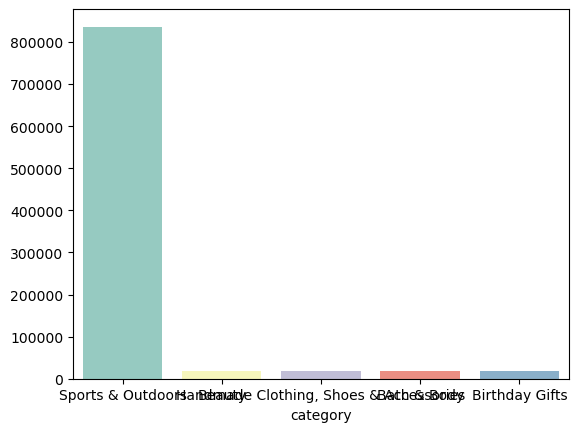

In [12]:
# Display the distribution of products across different categories using a bar chart.
# If you face problems understanding the chart, do it for a subset of top categories.

sns.barplot(x=frequency_table.head().index, y=frequency_table.head().values, palette="Set3")

<Axes: ylabel='count'>

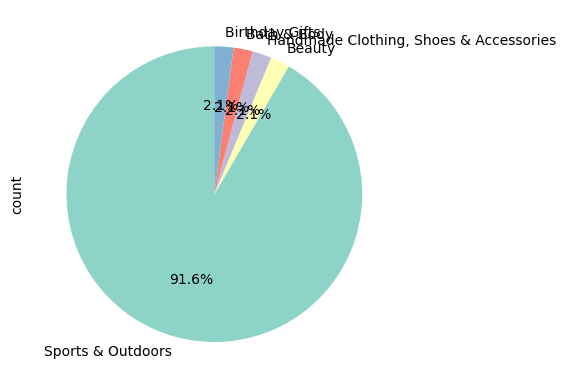

In [14]:
# For a subset of top categories, visualize their proportions using a pie chart.
# Does any category dominate the listings?
frequency_table.head().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [20]:
# Calculate the mean, median, and mode for the price of products.
avg_price = round(df['price'].mean(),2)
median_price = round(df['price'].median(),2)
mode_price = round(df['price'].mode(),2)[0]
avg_price, median_price, mode_price

(89.24, 19.09, 9.99)

In [ ]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
# The average price is much higher than the mode price. This means that there are a few big outliers of products with high prices
# that are bringing the mean higher than the mode.

In [24]:
# Determine the variance, standard deviation, range, and interquartile range for product price.
price_variance = round(df['price'].var(),2)
price_std = round(df['price'].std(),2)
price_iqr = round(df['price'].quantile([0.25, 0.5, 0.75]),2)
price_variance, price_std, price_iqr

(119445.49,
 345.61,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [28]:
# How varied are the product prices? Are there any indicators of a significant spread in prices?

max_price = max(df['price'])
min_price = min(df['price'])
range =  max_price - min_price
max_price, min_price, range


(100000.0, 0.0, 100000.0)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

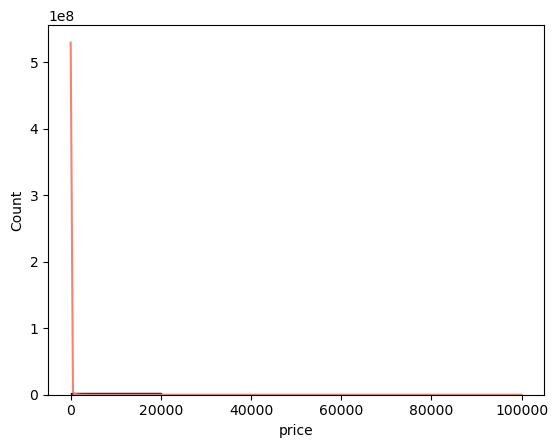

In [31]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices.
# If its hard to read these diagrams, think why this is, and explain how it could be solved.

sns.histplot(df['price'],kde=True, bins=5, color="salmon")

In [ ]:
# A huge number of prices at 0 dwarf my other values. I am unable to see the count of the other prices. If i could exclude 0 values, would be more
# useful


<Axes: >

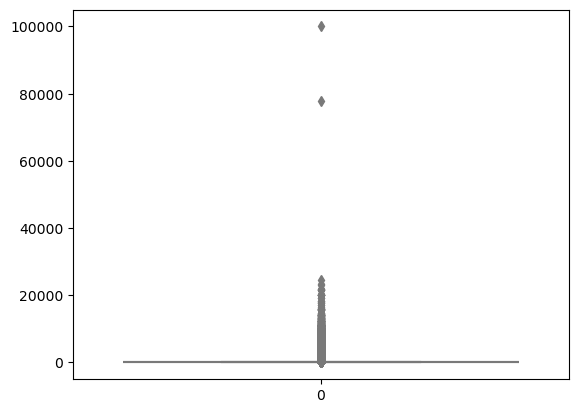

In [32]:
# Are there products that are priced significantly higher than the rest?
# Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(data = df['price'], color="lightblue")

In [36]:
# Calculate the mean, median, and mode for the rating of products.
avg_rating = round(df['stars'].mean(),2)
median_rating = round(df['stars'].median(),2)
mode_rating = round(df['stars'].mode(),2)[0]
avg_rating, median_rating, mode_rating

(2.15, 0.0, 0.0)

In [37]:
df['stars'].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [ ]:
# How do customers generally rate products? Is there a common trend?
# Most frequently they give 0 stars

In [38]:
# Determine the variance, standard deviation, and interquartile range for product rating.
rating_variance = round(df['stars'].var(),2)
rating_std = round(df['stars'].std(),2)
rating_iqr = round(df['stars'].quantile([0.25, 0.5, 0.75]),2)
rating_variance, rating_std, rating_iqr

(4.82,
 2.19,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

In [41]:
rating_kurtosis = df['stars'].kurtosis()
rating_skew = df['stars'].skew()
rating_kurtosis, rating_skew
# left skew

(-1.9260061280432985, 0.08120735761080985)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


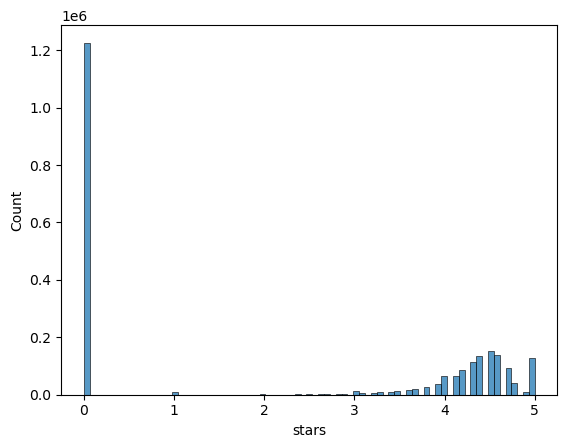

In [43]:
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(data=df['stars']);